In [123]:
import pandas as pd
from pandas import option_context
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import requests
import seaborn as sns
import datetime
import cliffsDelta as cd
import itertools

from tqdm import tqdm
from statsmodels.stats.inter_rater import fleiss_kappa,aggregate_raters
from scipy.stats import mannwhitneyu,shapiro,ttest_ind

In [124]:
QUERY_ROOT = "https://api.github.com"
TOKEN = "" # write your GitHub API key here
HEADERS = {"Authorization": "token " + TOKEN}

## Section 3

### Question 1

#### Write an automated Python script to identify the GitHub Apps in the list of accounts, by calling the GitHub Users API and extracting the required information to make this decision. 

#### More information: You can search for the "type" key in the obtianed JSON result, If it is "Bot", then it is an app, if it is "User", then it is an account.

In [125]:
# 1. Read the given .csv file into a pandas DataFrame (df).
# 2. Make sure there are 2 columns, one column name is "contributor" that has the name of the contributor, 
#    and another column name is "bothunter" that you will use later on in this assignment.
# 3. Display the DataFrame.

# YOUR CODE BELOW
df = pd.read_csv('homebrew_homebrew-core_3/homebrew_homebrew-core_3.csv')
# Check if the columns are correct
if 'contributor' not in df.columns or 'bothunter' not in df.columns:
    raise ValueError("The columns are not correct")

print(df)


            contributor bothunter
0       TanvirBhuiyan19     Human
1           AkihiroSuda     Human
2                xwjdsh     Human
3                 spaam     Human
4              messense     Human
5             woodruffw     Human
6            dev-errant     Human
7                ryenus     Human
8           coffeegoddd     Human
9              scpeters     Human
10               fsouza     Human
11            p-linnane     Human
12           bashofmann     Human
13             aliscott     Human
14           chenrui333       Bot
15             henryiii     Human
16    blockstack-devops       Bot
17               mrexox     Human
18           grafanabot       Bot
19           chiefmikey     Human
20           ArduinoBot       Bot
21              ik11235     Human
22              zmwangx     Human
23             sayomaki     Human
24               issyl0     Human
25             makigumo     Human
26                efiop     Human
27      semgrep-ci[bot]       Bot
28         dan

In [126]:
# 1. Store the names of the contributors in a list using the code snippet: 'df.contributor.to_list()'
# 2. print the list

# YOUR CODE BELOW

contributors = df.contributor.to_list()
print(contributors)

['TanvirBhuiyan19', 'AkihiroSuda', 'xwjdsh', 'spaam', 'messense', 'woodruffw', 'dev-errant', 'ryenus', 'coffeegoddd', 'scpeters', 'fsouza', 'p-linnane', 'bashofmann', 'aliscott', 'chenrui333', 'henryiii', 'blockstack-devops', 'mrexox', 'grafanabot', 'chiefmikey', 'ArduinoBot', 'ik11235', 'zmwangx', 'sayomaki', 'issyl0', 'makigumo', 'efiop', 'semgrep-ci[bot]', 'danielnachun', 'mxcl', 'phpstan-bot', 'sami-alajrami', 'uyjulian', 'MikeMcQuaid', 'pthariensflame', 'mise-en-dev', 'miles170', 'huacnlee', 'svc-devtoolsbot', 'github-actions[bot]']


In [127]:
# 1. Using a for loop, iterate over each contributor in the list and query the GitHub Users API.
#    You can use "query = f'{QUERY_ROOT}/users/{contributor}'", where QUERY_ROOT is defined at the beginning of this notebook 
#    above and 'contributor' is each individul contributor from the list
# 2. Get the response using 'response = requests.get(query, headers=HEADERS)'.
# 3. convert the response to JSON using 'json_response = response.json()'.
# 4. Iterate over this JSON response and get the value of the 'type' key. If it is "Bot" then the contributor is an App, 
#    if "User" then the contributor is an account. You should boolean values to indicate if the contributor is an App (True) or User/Organisation (False)
# 5. Save these results in list of dictionary of the form [{'contributor': <contributor name>, 'app': <boolean value>}, {...}, {...}, {...}].
#    Lets call this list as "app_list_dict"
# 6. Finally convert this list of dictionary to DataFrame by writing 'pd.DataFrame.from_dict(app_dict)'
# 7. Display the DataFrame. This should have two columns - contributor and app

# YOUR CODE BELOW
app_list = []
for user in contributors:
    query = f'{QUERY_ROOT}/users/{user}'
    response = requests.get(query, headers=HEADERS)
    json_response = response.json()
    if json_response['type'] == 'Bot':
        app_list.append({'contributor': user, 'app': True})
    else:
        app_list.append({'contributor': user, 'app': False})

app_df = pd.DataFrame.from_dict(app_list)
print(app_df)

            contributor    app
0       TanvirBhuiyan19  False
1           AkihiroSuda  False
2                xwjdsh  False
3                 spaam  False
4              messense  False
5             woodruffw  False
6            dev-errant  False
7                ryenus  False
8           coffeegoddd  False
9              scpeters  False
10               fsouza  False
11            p-linnane  False
12           bashofmann  False
13             aliscott  False
14           chenrui333  False
15             henryiii  False
16    blockstack-devops  False
17               mrexox  False
18           grafanabot  False
19           chiefmikey  False
20           ArduinoBot  False
21              ik11235  False
22              zmwangx  False
23             sayomaki  False
24               issyl0  False
25             makigumo  False
26                efiop  False
27      semgrep-ci[bot]   True
28         danielnachun  False
29                 mxcl  False
30          phpstan-bot  False
31      

### Question 2

#### Add an app column in the CSV file to store this information. You can write True if it is an app and False if it is not.


In [128]:
# Merge the app DataFrame to df by writing 'pd.merge(df, <app df>, on='contributor'). This is similar to SQL join on primary key 'contributor'.
# The resultant df should have 3 columns - contributor, bothunter and app.

# YOUR CODE BELOW
df = pd.merge(df, app_df, on='contributor')
print(df)

            contributor bothunter    app
0       TanvirBhuiyan19     Human  False
1           AkihiroSuda     Human  False
2                xwjdsh     Human  False
3                 spaam     Human  False
4              messense     Human  False
5             woodruffw     Human  False
6            dev-errant     Human  False
7                ryenus     Human  False
8           coffeegoddd     Human  False
9              scpeters     Human  False
10               fsouza     Human  False
11            p-linnane     Human  False
12           bashofmann     Human  False
13             aliscott     Human  False
14           chenrui333       Bot  False
15             henryiii     Human  False
16    blockstack-devops       Bot  False
17               mrexox     Human  False
18           grafanabot       Bot  False
19           chiefmikey     Human  False
20           ArduinoBot       Bot  False
21              ik11235     Human  False
22              zmwangx     Human  False
23             s

### Question 3

#### Report on the total number of GitHub Apps, and User accounts present in the list of accounts of your dataset.

In [129]:
# Return the number of false and true values
false_count = app_df['app'].value_counts()[0]
true_count = app_df['app'].value_counts()[1]
print(f"False count: {false_count}, True count: {true_count}")
app_df['app'].value_counts()

False count: 38, True count: 2


/tmp/ipykernel_92512/3408985260.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  false_count = app_df['app'].value_counts()[0]
/tmp/ipykernel_92512/3408985260.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  true_count = app_df['app'].value_counts()[1]


app
False    38
True      2
Name: count, dtype: int64

## Section 4

### Question 1

#### Write an automated script to report on the prediction of the GitHub accounts in your dataset, using BoDeGHa and RABBIT bot identification tools. For each tool, your script should add an extra column to the CSV ﬁle of your dataset, reporting the prediction (bot, human, unknown) of the considered tool on the considered account.

#### More information:
You can write an automated script to execute BoDeGHa and RABBIT, and save the results in a DataFrame. For BoDeGHa, you can ask the tool to give the output in CSV format, save it as a csv file and read it in a DataFrame. For RABBIT, you can use its internal argument to store the results in a .csv file and read it in a DataFrame. Remember to read their Documentation (Readme.md) for their input arguments and example outputs before using these tools.  
Similar to what you did in Section 2 - Question 1 and 2, add an additional column named 'bodegha' to store the predictions 
given by BoDeGHa and add another column called 'rabbit' to store the preditions given by RABBIT. 

In [130]:
# Read the .csv file that has the predicitons given by BoDeGHa.

# YOUR CODE BELOW

# bodegha -> From file (error with python 3.11)
bdegha_rep = pd.read_csv('homebrew_homebrew-core_3/bodegha_predictions.csv')
# For users not in this csv file but in the previous one, add them with a value of 'Unkwown'
list_unknown = []
for user in df['contributor']:
    if user not in bdegha_rep['account'].to_list():
        list_unknown.append({'account': user, 'prediction': 'Unknown'})

df2 = pd.DataFrame.from_dict(list_unknown)
bdegha_rep = pd.concat([bdegha_rep, df2])
bdegha_rep = bdegha_rep.rename(columns={'account': 'contributor', 'prediction' : 'bodegha'})
# save the file
bdegha_rep.to_csv('homebrew_homebrew-core_3/bodegha_predictions_full.csv', index=False)


In [131]:
# merge it to df - Now your df should have the following four columns - contributor, bothunter, app, bodegha
# YOUR CODE BELOW
df = pd.merge(df, bdegha_rep, on='contributor')
df.head(n = 10)


,contributor,bothunter,app,bodegha
0,TanvirBhuiyan19,Human,False,Unknown
1,AkihiroSuda,Human,False,Bot
2,xwjdsh,Human,False,Unknown
3,spaam,Human,False,Unknown
4,messense,Human,False,Unknown
5,woodruffw,Human,False,Human
6,dev-errant,Human,False,Unknown
7,ryenus,Human,False,Unknown
8,coffeegoddd,Human,False,Unknown
9,scpeters,Human,False,Human


In [132]:
# Read the predictions given by RABBIT from the corresponding .csv file

# YOUR CODE BELOW
# Clear the rabbit prediction file
rabbit_rep = pd.read_csv("homebrew_homebrew-core_3/rabbit_predictions.csv")
# remove index and confidence columns
rabbit_rep = rabbit_rep.drop(["index", "confidence"], axis=1)

# add unknown users
list_unknown = []
for user in df["contributor"]:
    if user not in rabbit_rep["account"].to_list():
        list_unknown.append({"account": user, "prediction": "Unknown"})

df2 = pd.DataFrame.from_dict(list_unknown)
rabbit_rep = pd.concat([rabbit_rep, df2])
rabbit_rep = rabbit_rep.rename(
    columns={"account": "contributor", "prediction": "rabbit"}
)

# save the file
rabbit_rep.to_csv("homebrew_homebrew-core_3/rabbit_predictions_full.csv", index=False)

In [133]:
# merge it to df - Now your df should have the following five columns - contributor, bothunter, app, bodegha, rabbit

# YOUR CODE BELOW
df = pd.merge(df, rabbit_rep, on="contributor")
df.head(n=10)


,contributor,bothunter,app,bodegha,rabbit
0,TanvirBhuiyan19,Human,False,Unknown,human
1,AkihiroSuda,Human,False,Bot,human
2,xwjdsh,Human,False,Unknown,human
3,spaam,Human,False,Unknown,bot
4,messense,Human,False,Unknown,human
5,woodruffw,Human,False,Human,human
6,dev-errant,Human,False,Unknown,bot
7,ryenus,Human,False,Unknown,human
8,coffeegoddd,Human,False,Unknown,bot
9,scpeters,Human,False,Human,human


In [134]:
# Replace the prediction result given by rabbit from 'bot' to 'Bot', 'app' to 'Bot', 'human' to 'Human', 'unknown' to 'Unknown' to maintain consistency

# YOUR CODE BELOW
df['rabbit'] = df['rabbit'].replace({'bot': 'Bot', 'app': 'Bot', 'human': 'Human', 'unknown': 'Unknown'})
df.head(n=10)



,contributor,bothunter,app,bodegha,rabbit
0,TanvirBhuiyan19,Human,False,Unknown,Human
1,AkihiroSuda,Human,False,Bot,Human
2,xwjdsh,Human,False,Unknown,Human
3,spaam,Human,False,Unknown,Bot
4,messense,Human,False,Unknown,Human
5,woodruffw,Human,False,Human,Human
6,dev-errant,Human,False,Unknown,Bot
7,ryenus,Human,False,Unknown,Human
8,coffeegoddd,Human,False,Unknown,Bot
9,scpeters,Human,False,Human,Human


### Question 2

#### Add an extra column to the CSV ﬁle called 'manual' that has the label determined by you. For each account, of your own opinion on its nature (bot, human or unknown only in case of doubt) on the basis of a manual veriﬁcation of the contributor’s activities in the repository through the GitHub UI and through the GitHub Events API https://api.github.com/users/username/events, and taking into account the prediction made by the bot identification tools.

#### More information:
For each contributor, look at their activities in GitHub UI, look at their latest events using GitHub Events API - https://api.github.com/users/<contributor\>/events, to make a decision on their type. 

In addition, you should also write a very small reason why do you think they are bot or human (e.g., same activity at regular interval so Bot, files committed and code modified looks like Human, comments look like Human, comment look like Bot, test report looks automated so Bot, and so on....). This might be useful to answer the next question as well.

In [135]:
# Write your manual decision here
# example :
# manual_list_dict = [{'contributor': 'tommens', 'manual': 'human'}, {....}, {....}, {....}]
# pd.DataFrame.from_dict(manual_list_dict)

# YOUR CODE BELOW
manual_list_dict = [
    {"contributor": "TanvirBhuiyan19", "manual": "Human"}, 
    {"cohtributor": "AkihiroSuda", "manual": "Unkown"}, # Comments looks like it is a Human but his commits are mainly versions updates
    {"contributor": "xwjdsh", "manual": "Human"},  # Code modified looks like Human
    # cancel and go to next step    
]

In [136]:
# merge it with df of predictions. Now your df should have the following six columns
# contributor, bothunter, app, bodegha, rabbit, manual

# YOUR CODE BELOW


### Question 3

#### Study and report the purpose of these identified bots and humans in the repository assigned to you. 

For example, the purpose can be based on but not limited to - 

the type of activities that they are performing (releasing a version on every Sunday, updating the documentation), type of comments they are posting (reviewing code, test summary report), when are they triggered (when a new PR is created, when someone in the project ask the bot to merge the code) and so on. \textbf{Note:} The purpose can be other than what is provided in examples above. 


In [137]:
# svc-devtoolsbot : - Commits on homebrew-core everytime a new version of mongosh is released
#                   - Create release on mongosh


### Question 4

#### Create a column named 'type' to the CSV ﬁle and write your ﬁnal decision on the type of contributor. The ﬁnal decision on their type is the prediciton that majority of the raters predicted (you can ignore the 'Unknown'), in the case of contradiction, you can finalise it as Human.
#### Case 1: If two raters has mentioned a contributor as Bot and others mentioned it as 'Unknown', then the type of the account is Bot.  
#### Case 2: If 3 raters give 'Unknown' to a contributor then the prediction given by the fourth rater is final.
#### Case 3: If 2 raters give the prediciton as 'Bot' and 2 raters give it as 'Human', then the final decision is 'Human'
#### In this step, GitHub Apps should be marked as App and not as a Bot.

In [138]:
# Make a final decision on the type based on the predictions given by bothunter, bodegha, bothunter and your manual labelling. 
# Now your df should contain seven columns - contributor, bothunter, app, bodegha, rabbit, manual and type

# YOUR CODE BELOW
# for each row, if the prediction is the same for all the columns, then that is the final decision
# if the predictions are different, then the final decision is the maximum occuring prediction
# if there is a tie, then the final decision is 'Human'
# Ignore the 'Unkowns"

# YOUR CODE BELOW
list = []
for index, row in df.iterrows():
    contributor = row['contributor']
    app = row['app']
    predictions = row[['bothunter', 'bodegha', 'rabbit']]
    bot = 0
    human = 0
    for prediction in predictions:
        if prediction == 'Bot':
            bot += 1
        elif prediction == 'Human':
            human += 1
    if bot > human:
        if app:
            final_prediction = 'App'
        else:
            final_prediction = 'Bot'
    else:
        final_prediction = 'Human'

    list.append({'contributor': contributor, 'type': final_prediction})

final_df = pd.DataFrame.from_dict(list)
final_df.head(n=10)
df_type = pd.merge(df, final_df, on='contributor')
df_type.head(n=10)


,contributor,bothunter,app,bodegha,rabbit,type
0,TanvirBhuiyan19,Human,False,Unknown,Human,Human
1,AkihiroSuda,Human,False,Bot,Human,Human
2,xwjdsh,Human,False,Unknown,Human,Human
3,spaam,Human,False,Unknown,Bot,Human
4,messense,Human,False,Unknown,Human,Human
5,woodruffw,Human,False,Human,Human,Human
6,dev-errant,Human,False,Unknown,Bot,Human
7,ryenus,Human,False,Unknown,Human,Human
8,coffeegoddd,Human,False,Unknown,Bot,Human
9,scpeters,Human,False,Human,Human,Human


### Question 5 (a)

#### Compute and report the Fleiss Kappa interrater agreement score between the labels computed by all bot identiﬁcation tools.

##### For example:

converted_df = aggregate_raters(np.array(df[['rater1','rater2']]))  
kappa = fleiss_kappa(converted_df[0])  
print('kappa')  

#### a. between bothunter and rabbit

In [139]:
df_a = aggregate_raters(np.array(df_type[['bothunter', 'rabbit']]))
kappa_a = fleiss_kappa(df_a[0])
print(f"Kappa for bothunter and rabbit: {kappa_a}")

Kappa for bothunter and rabbit: 0.4188861985472156


#### b. between bothunter and bodegha

In [140]:
df_b = aggregate_raters(np.array(df_type[["bothunter", "bodegha"]]))
kappa_b = fleiss_kappa(df_b[0])
print(f"Kappa for bothunter and rabbit: {kappa_b}")

Kappa for bothunter and rabbit: -0.1903540277065161


#### c. between bodegha and rabbit

In [141]:
df_c = aggregate_raters(np.array(df_type[["bodegha", "rabbit"]]))
kappa_c = fleiss_kappa(df_c[0])
print(f"Kappa for bothunter and rabbit: {kappa_c}")

Kappa for bothunter and rabbit: -0.20446818844099077


#### d. between bothunter, bodegha and rabbit

In [142]:
df_d = aggregate_raters(np.array(df_type[["bothunter", "rabbit", "bodegha"]]))
kappa_d = fleiss_kappa(df_d[0])
print(f"Kappa for bothunter and rabbit: {kappa_d}")

Kappa for bothunter and rabbit: 0.01686060318214208


### Question 5 (b)
#### Report on
#### a. What is you interpretation from the kappa values (use the table provided in the description document)? what do you understand?

In [143]:
# BotHunter and RABBIT have a kappa value of 0.4189 which is considered as moderate agreement.
# BotHunter and BoDeGHa have a kappa value of -0.1904 which is considered as slight agreement.
# BoDeGHa and RABBIT have a kappa value of -0.2045 which is considered as fair agreement.

# All three together have a kappa value of 0.01687 which is considered as slight / no agreement.

# -> botHunter and RABBIT have the best agreement

#### b. Based on your previous analysis, which bot identification tool would you use, if you want to predict if a contributor is a human or bot? Motivate your answer

In [144]:
# Each time BoDeGHa is used, it disagrees with the other tools. However, Rabbit and BotHunter have a moderate agreement.
# I would use BotHunter or Rabbit to make a decision.
# With these results, I don't really if we can make a better decision. 

## Section 5

#### Query the GitHub Events API to get maximum possible events for each contributor (maximum is 300 events).  
#### You can use the following query: '{QUERY_ROOT}/users/{contributor}/events?per_page=100&page={page}' where page = 1 or 2 or 3  
#### As you did in earlier task, make a request to GitHub Events API with the required headers, convert the response to JSON, extract the following fields and store in a DataFrame:
Event id - json_response['event_id']  
Name of the contributor - json_response['actor']['login']  
Name of the repository - json_response['repository']['name']  
Type of event - json_response['type']  
Time of event - json_response['created_at']

#### Hint: Query the GitHubEvents API for all contributors. Append the obtained JSON result to a list of JSONs. Process one dictionary after other to get your required fields and store them in another list of dictionaries. Finally convert this dictionaty to DataFrame. OR You can directly convert the list of JSONs to DataFrame using pd.json_normalize() and select the required columns alone.

#### The resultant dataframe should have all the recent events performed by all the contributors and the following columns should be present in them - event_id, contributor, repo_name, event_type, created_at.


In [145]:
# YOUR CODE BELOW
event_list = []
for user in contributors:
    for k in range(1,4):
        query = f"{QUERY_ROOT}/users/{user}/events?per_page=100&page={k}"
        response = requests.get(query, headers=HEADERS)
        json_response = response.json()
        for event in json_response:
            event_dict = {}
            event_dict['event_id'] = event['id']
            event_dict["contributor"]= event['actor']['login']
            event_dict["repository"] = event['repo']['name']
            event_dict["type"] = event['type']
            event_dict["created_at"] = event['created_at']
            event_list.append(event_dict)

event_df = pd.DataFrame.from_dict(event_list)

In [146]:
event_df.head(n=10)

,event_id,contributor,repository,type,created_at
0,36619627668,TanvirBhuiyan19,CodeWaveWithAsante/FLAVORVERSE,WatchEvent,2024-03-17T11:25:42Z
1,36619627528,TanvirBhuiyan19,NanmiCoder/MediaCrawler,WatchEvent,2024-03-17T11:25:41Z
2,36619627385,TanvirBhuiyan19,tiangolo/full-stack-fastapi-template,WatchEvent,2024-03-17T11:25:40Z
3,36619626389,TanvirBhuiyan19,Talha836902/amazon-clone-main,WatchEvent,2024-03-17T11:25:32Z
4,36616459909,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-17T04:24:44Z
5,36409764770,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-10T13:23:46Z
6,36407651586,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-10T10:00:28Z
7,36405830425,TanvirBhuiyan19,enorsia/assets,CreateEvent,2024-03-10T06:32:08Z
8,36084985024,TanvirBhuiyan19,instill-ai/instill-core,WatchEvent,2024-02-28T11:35:47Z
9,36084984640,TanvirBhuiyan19,Udemig/9-Hafta-ici-Crud,WatchEvent,2024-02-28T11:35:46Z


In [147]:
# Save event_df to csv
event_df.to_csv("homebrew_homebrew-core_3/events.csv", index=False)

### Question 1
#### Group each event into the following four categories

Issues: IssueCommentEvent, IssuesEvent  
Pull Requests: PullRequestEvent, PullRequestReviewCommentEvent  
Commits: CommitCommentEvent, PushEvent  
Repository: CreateEvent, DeleteEvent, ForkEvent, GollumEvent, MemberEvent, PublicEvent, ReleaseEvent, SponsorshipEvent, WatchEvent  

#### Hint:
1. Add a column called event_group that mentions which event group does that event belong to. Each event (row) should correspond to an event group.  
2. Then perform groupby on ['contributor','event_group'],  
3. use .agg (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html) to count the number of events performed by each contributor in each group,  
4. use pivot with the required arguments (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html). An example is given [here](#pivot_example) in question 2(b), and  
5. finally merge it with your 'type' field from the DataFrame you got in Section4

The final DataFrame should be looking like the following  
![](event_group.png)

In [148]:
# In the resultant DataFrame - each row should corespond to a contributor, and the columns should have all the event groups  
# and the type of the contributor (that you decided in the previous DataFrame) and the values should be the number 
# of events of that event event group the contriubutor has performed.

# read csv
event_df = pd.read_csv("homebrew_homebrew-core_3/events.csv")

issue_group = ['IssueCommentEvent', 'IssuesEvent']
pr_group = ['PullRequestEvent', 'PullRequestReviewCommentEvent']
commit_group = ['CommitCommentEvent', 'PushEvent']
repo_group = ['CreateEvent', 'DeleteEvent', 'ForkEvent', 'GollumEvent', 'MemberEvent', 'PublicEvent', 'ReleaseEvent', 'SponsorshipEvent', 'WatchEvent']

In [171]:
import numpy as np

# YOUR CODE BELOW
event_df['event_group'] = np.nan
event_df.loc[event_df['type'].isin(issue_group), 'event_group'] = 'issue'
event_df.loc[event_df['type'].isin(pr_group), 'event_group'] = 'PR'
event_df.loc[event_df['type'].isin(commit_group), 'event_group'] = 'commit'
event_df.loc[event_df['type'].isin(repo_group), 'event_group'] = 'repo'

# 3
grouped = event_df.groupby(['contributor', 'event_group']).agg(num_event=('event_id', 'count')).reset_index()

grouped.head(n=10)


/tmp/ipykernel_92512/311261918.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'issue' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  event_df.loc[event_df['type'].isin(issue_group), 'event_group'] = 'issue'


,contributor,event_group,num_event
0,AkihiroSuda,PR,98
1,AkihiroSuda,commit,46
2,AkihiroSuda,issue,43
3,AkihiroSuda,repo,9
4,ArduinoBot,PR,27
5,ArduinoBot,commit,1
6,ArduinoBot,repo,8
7,MikeMcQuaid,PR,74
8,MikeMcQuaid,commit,45
9,MikeMcQuaid,issue,80


In [150]:
# YOUR CODE BELOW
# use pivot
pivot_df = grouped.pivot(index='contributor', columns='event_group', values='num_event').reset_index()
print(pivot_df.head(n=10))

event_group        contributor     PR  commit  issue  repo
0                  AkihiroSuda   98.0    46.0   43.0   9.0
1                   ArduinoBot   27.0     1.0    NaN   8.0
2                  MikeMcQuaid   74.0    45.0   80.0  26.0
3              TanvirBhuiyan19    NaN     3.0    NaN  84.0
4                     aliscott  153.0    56.0    5.0  43.0
5                   bashofmann   65.0    67.0   17.0  39.0
6            blockstack-devops    6.0    34.0  101.0  69.0
7                   chenrui333   43.0    45.0   43.0  42.0
8                   chiefmikey   60.0   136.0    7.0  67.0
9                  coffeegoddd   74.0    49.0   68.0  51.0


In [155]:
# merge
final_df = pd.merge(df_type, pivot_df, on='contributor')
# Remove columns that are not needed
final_df = final_df.drop(['bothunter', 'bodegha', 'rabbit', 'app'], axis=1)
final_df.head(n=10)

,contributor,type,PR,commit,issue,repo
0,TanvirBhuiyan19,Human,NaN,3.0,NaN,84.0
1,AkihiroSuda,Human,98.0,46.0,43.0,9.0
2,xwjdsh,Human,19.0,87.0,12.0,75.0
3,spaam,Human,NaN,NaN,18.0,NaN
4,messense,Human,52.0,89.0,79.0,41.0
5,woodruffw,Human,80.0,73.0,41.0,44.0
6,dev-errant,Human,1.0,14.0,NaN,6.0
7,ryenus,Human,3.0,31.0,9.0,17.0
8,coffeegoddd,Human,74.0,49.0,68.0,51.0
9,scpeters,Human,89.0,50.0,59.0,42.0


In [156]:
# Save to CSV
final_df.to_csv("homebrew_homebrew-core_3/event_type.csv", index=False)

### Question 2 (a)

#### Compute the median number of events per event group for Bot+Apps and Humans and write in DataFrame.

Row should correspond to type (Bot_App and Human), Column should have Event group name and the values should be the median value of Bot_App or Human for that particular event group.

In [157]:
# YOUR CODE BELOW
# Group APP and Bot together

medians = []
for event_group in ['PR', 'commit', 'issue', 'repo']:
    # APP & Bot
    median_bot = final_df[(final_df['type'] == 'Bot') | (final_df['type'] == 'App')][event_group].median()
    medians.append({'event_group': event_group, 'median': median_bot, 'type': 'Bot_app'})

    # Human
    median_human = final_df[final_df['type'] == 'Human'][event_group].median()
    medians.append({'event_group': event_group, 'median': median_human, 'type': 'Human'})

df_medians = pd.DataFrame.from_dict(medians)
df_medians.head(n=10)

,event_group,median,type
0,PR,19.0,Bot_app
1,PR,66.0,Human
2,commit,115.5,Bot_app
3,commit,70.5,Human
4,issue,66.0,Bot_app
5,issue,30.0,Human
6,repo,61.0,Bot_app
7,repo,53.0,Human


### Question 2 (b)

Plot a heatmap of the DataFrame using seaborn - 
1. First convert the dataframe to the required format using pivot, example is given below
2. plot using seaborn - sns.heatmap(df_medians, annot=True, vmin=0, vmax=300, cmap="crest"). More details: https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [158]:
# YOUR CODE BELOW
df_medians = df_medians.pivot(index='type', columns='event_group', values='median').reset_index().rename_axis(None, axis=1)
print(df_medians)

      type    PR  commit  issue  repo
0  Bot_app  19.0   115.5   66.0  61.0
1    Human  66.0    70.5   30.0  53.0


<Axes: xlabel='type'>

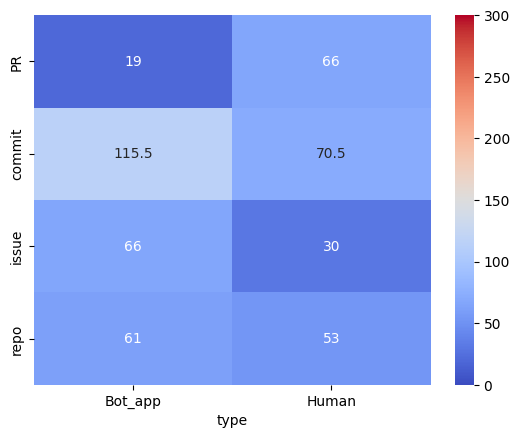

In [159]:
# YOUR CODE BELOW
# Plot the heatmap
sns.heatmap(df_medians.set_index('type').T, vmin=0, vmax=300, annot=True, fmt="g", cmap='coolwarm')


#### What is the difference that you observe between Bots+Apps and Humans?

In [ ]:
# Overall, bots have a higher median number of events compared to humans.

#### What is the differnce that you observe between Event groups?

In [ ]:
# There are more event of type 'commit' while the others are quite similar.

#### What is the difference that you observe between Bots+Apps and Humans and Event groups all considering at the same time?

In [ ]:
# Bots are more active in 'commit', 'repo' and 'issue' events compared to humans and humans are more active in 'PR' events.

### Question 3

#### Create box plots or boxen plots or violin plots or a combination of these to visualise the distribution of number of events in each event group. 
#### For more information you can visit - https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### For violin plots - https://seaborn.pydata.org/generated/seaborn.violinplot.html  
#### You should highlight the data points that correspond to bots using a stripplot in seaborn. https://seaborn.pydata.org/tutorial/categorical.html#categorical-tutorial  
#### Interpret the results of the visualisation.

<Axes: ylabel='PR'>

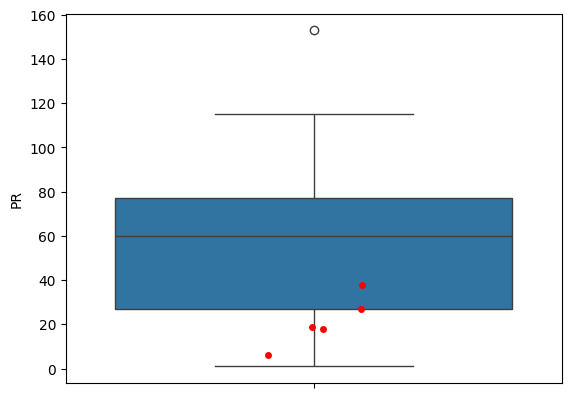

In [160]:
# YOUR CODE BELOW - Visualize number of events from pull request event group
sns.boxplot(y='PR', data=final_df)
sns.stripplot(
    y="PR",
    data=final_df[(final_df["type"] == "Bot")],
    color="red",
)

Bots tend to be less active in PR events since all the points are near the 25% percentile or below.

<Axes: ylabel='issue'>

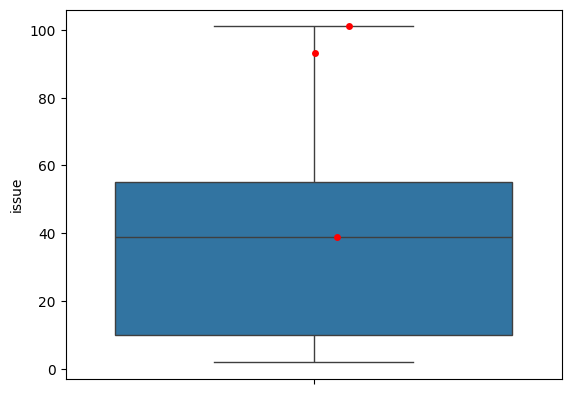

In [161]:
# YOUR CODE BELOW - Visualise number of events from issue event group
# Boxplot and violin plot side by side, different graph
sns.boxplot(y="issue", data=final_df)
sns.stripplot(
    y="issue",
    data=final_df[(final_df["type"] == "Bot")],
    color="red",
)

Here, we can see that bots are more active in commit events compared to humans. (Points way beyond the 75% percentile)

<Axes: ylabel='commit'>

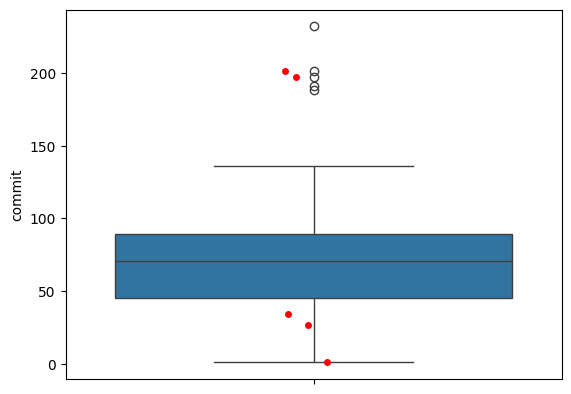

In [162]:
# YOUR CODE BELOW - Visualise number of events from commit event group
sns.boxplot(y="commit", data=final_df)
sns.stripplot(
    y="commit",
    data=final_df[(final_df["type"] == "Bot")],
    color="red",
)

Here we can see that bots are either very active in term of commits or not very active.  
This could be explained by the fact that some bots are used to automatically respond to issues only and not to commits. 
While some bots are used to commit code automatically to the repository.

<Axes: ylabel='repo'>

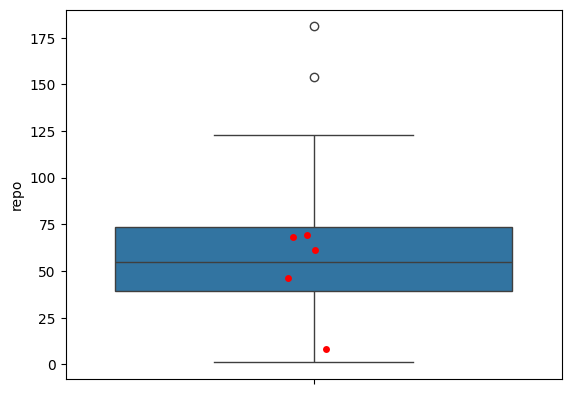

In [163]:
# YOUR CODE BELOW - Visualise number of events from repo event group
sns.boxplot(y="repo", data=final_df)
sns.stripplot(
    y="repo",
    data=final_df[(final_df["type"] == "Bot")],
    color="red",
)

We can see that bots are in the same range as humans in terms of repository events.

### Question 4.1

#### Statistical identify whether number of events in each event group is normally distributed or not.
#### Null hypothesis - $H_0$: Sample comes from the data that has normal distribution.
#### Use Shapiro-Wilk test for this purpose. Use the p-value with a threshold of 0.05 to determine whether $H_0$ can be rejected with statistical significance or not. 

#### Use shapiro from scipy.stats to perform this test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html)

In [164]:
# copy the final_df
final_df_copy = final_df.copy()
final_df_copy.fillna(0, inplace=True)

is_rejected = {}

# YOUR CODE BELOW
# Test if the distributions are normal
# PR
stat, p = shapiro(final_df_copy['PR'])
if p < 0.05:
    print(f"PR: p-value = {p} - Reject")
    is_rejected['PR'] = True
else:
    is_rejected['PR'] = False
    print(f"PR: p-value = {p} - Fail to reject")


# Issue
stat, p = shapiro(final_df_copy['issue'])
if p < 0.05:
    is_rejected['issue'] = True
    print(f"Issue: p-value = {p} - Reject")
else:
    is_rejected['issue'] = False
    print(f"Issue: p-value = {p} - Fail to reject")    

# Commit
stat, p = shapiro(final_df_copy['commit'])
if p < 0.05:
    is_rejected['commit'] = True
    print(f"Commit: p-value = {p} - Reject")
else:
    is_rejected['commit'] = False
    print(f"Commit: p-value = {p} - Fail to reject")

# Repo
stat, p = shapiro(final_df_copy['repo'])
if p < 0.05:
    is_rejected['repo'] = True
    print(f"Repo: p-value = {p} - Reject")
else:
    is_rejected['repo'] = False
    print(f"Repo: p-value = {p} - Fail to reject")


PR: p-value = 0.0932670459151268 - Fail to reject
Issue: p-value = 0.00012712815077975392 - Reject
Commit: p-value = 0.00168041349388659 - Reject
Repo: p-value = 0.01636296696960926 - Reject


### Question 4.2
#### Determine if there is any statistical diﬀerence in number of events between the identified event groups. Perform this test on all pairs of event groups. 
#### Null hypothesis - $H_0$: Any two event group come from the same population.
#### If $H_0$ is rejected in Shapiro-Wilk test (at least for one of the two event groups considered for test), use the Mann-Whitney U statistical test for this purpose. If $H_0$ is not rejected in Shapiro-Wilk test, use the independent t-test for this purpose.  
#### In any case, use the p-value with a threshold of 0.01 to determine whether $H_0$ can be rejected with statistical significance. 

#### Use mannwhitneyu from scipy.stats to perform Mann-Whitney U test (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html) 
#### or 
#### ttest_ind from scipy.stats to perform independent t-test https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.

#### More information:

You can pass the following arguments to mannwhitneyu from scipy.stats - (method='exact', nan_policy='omit'). For ttest_ind you can use - (nan_policy='omit')

In [165]:
# YOUR CODE BELOW
# For every pair of event groups, test if the distributions are different
for event1, event2 in itertools.combinations(['PR', 'issue', 'commit', 'repo'], r=2):
    if is_rejected[event1] or is_rejected[event2]:
        print(f"=== {event1} and {event2} ===")
        # Perform Mann-Whitney U test
        stat, p = mannwhitneyu(final_df_copy[event1], final_df_copy[event2], method='exact', nan_policy='omit')
        if p < 0.01:
            print(f"Mann-Whitney U test => p-value = {p:.4f} - Reject")
        else:
            print(f"Mann-Whitney U test => p-value = {p:.4f} - Fail to reject")
    else:
        # Perform t-test
        print(f"=== {event1} and {event2} ===")
        stat, p = ttest_ind(final_df_copy[event1], final_df_copy[event2], nan_policy='omit')
        if p < 0.01:
            print(f"t-test => p-value = {p:.4f} - Reject")
        else:
            print(f"t-test => p-value = {p:.4f} - Fail")
    print("\n")

=== PR and issue ===
Mann-Whitney U test => p-value = 0.0057 - Reject


=== PR and commit ===
Mann-Whitney U test => p-value = 0.0681 - Fail to reject


=== PR and repo ===
Mann-Whitney U test => p-value = 0.5754 - Fail to reject


=== issue and commit ===
Mann-Whitney U test => p-value = 0.0000 - Reject


=== issue and repo ===
Mann-Whitney U test => p-value = 0.0004 - Reject


=== commit and repo ===
Mann-Whitney U test => p-value = 0.1483 - Fail to reject




### Question 5
#### Each time you reject the null hypothesis $H_0$, quantify the effect size of the diﬀerence between the groups using cliﬀ’s delta ($\delta$). 
#### To calculate cliﬀ’s delta, you can pass the list of values to cliﬀ delta.py file given in the repository. E.g., cliffsDelta.cliffsDelta(list of values). This will return the effect size and its interpretation (negligible, small, medium, large).

In [167]:
# YOU CODE BELOW

cliff_delta_pr_issue = cd.cliffsDelta(final_df_copy['PR'], final_df_copy['issue'])
print(f"Cliff's Delta for PR and Issue: {cliff_delta_pr_issue}")

cliff_delta_issue_commit = cd.cliffsDelta(final_df_copy['issue'], final_df_copy['commit'])
print(f"Cliff's Delta for Issue and Commit: {cliff_delta_issue_commit}")

cliff_delta_issue_repo = cd.cliffsDelta(final_df_copy['issue'], final_df_copy['repo'])
print(f"Cliff's Delta for Issue and Repo: {cliff_delta_issue_repo}")

Cliff's Delta for PR and Issue: (0.35625, 'medium')
Cliff's Delta for Issue and Commit: (-0.53875, 'large')
Cliff's Delta for Issue and Repo: (-0.450625, 'medium')


### Qusetion 6

#### Create violinplots to visualise the distributions for the following metrics and answer the questions that follow it. You should highlight the data points corresponding to bots using a stripplot in seaborn.

#### Hint:

1. Merge you DataFrame of event with the type of contributor that you identified in section 3.
2. Write a function that you will use for all the seaborn plots. This way you can reduce duplication and update it easily.

In [168]:
# print df
display(event_df.head(n=10))

display(app_df.head(n=10))

display(final_df.head(n=10))

,event_id,contributor,repository,type,created_at,event_group
0,36619627668,TanvirBhuiyan19,CodeWaveWithAsante/FLAVORVERSE,WatchEvent,2024-03-17T11:25:42Z,repo
1,36619627528,TanvirBhuiyan19,NanmiCoder/MediaCrawler,WatchEvent,2024-03-17T11:25:41Z,repo
2,36619627385,TanvirBhuiyan19,tiangolo/full-stack-fastapi-template,WatchEvent,2024-03-17T11:25:40Z,repo
3,36619626389,TanvirBhuiyan19,Talha836902/amazon-clone-main,WatchEvent,2024-03-17T11:25:32Z,repo
4,36616459909,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-17T04:24:44Z,commit
5,36409764770,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-10T13:23:46Z,commit
6,36407651586,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-10T10:00:28Z,commit
7,36405830425,TanvirBhuiyan19,enorsia/assets,CreateEvent,2024-03-10T06:32:08Z,repo
8,36084985024,TanvirBhuiyan19,instill-ai/instill-core,WatchEvent,2024-02-28T11:35:47Z,repo
9,36084984640,TanvirBhuiyan19,Udemig/9-Hafta-ici-Crud,WatchEvent,2024-02-28T11:35:46Z,repo


,contributor,app
0,TanvirBhuiyan19,False
1,AkihiroSuda,False
2,xwjdsh,False
3,spaam,False
4,messense,False
5,woodruffw,False
6,dev-errant,False
7,ryenus,False
8,coffeegoddd,False
9,scpeters,False


,contributor,type,PR,commit,issue,repo
0,TanvirBhuiyan19,Human,NaN,3.0,NaN,84.0
1,AkihiroSuda,Human,98.0,46.0,43.0,9.0
2,xwjdsh,Human,19.0,87.0,12.0,75.0
3,spaam,Human,NaN,NaN,18.0,NaN
4,messense,Human,52.0,89.0,79.0,41.0
5,woodruffw,Human,80.0,73.0,41.0,44.0
6,dev-errant,Human,1.0,14.0,NaN,6.0
7,ryenus,Human,3.0,31.0,9.0,17.0
8,coffeegoddd,Human,74.0,49.0,68.0,51.0
9,scpeters,Human,89.0,50.0,59.0,42.0


In [169]:
# YOUR CODE BELOW - function for seaborn plot

# Merge
type_event_df = pd.merge(event_df, app_df, on='contributor')
# type_event_df.fillna(0, inplace=True))
display(type_event_df.head(n=10))

def plot_violin(df, event_group='All'):
    if event_group == 'All':
        event_group = ['PR', 'issue', 'commit', 'repo']
    sns.violinplot(y=event_group, data=df)
    sns.stripplot(
        y=event_group, 
        data=df[(df["type"] == "Bot")], 
        color="red",
    )
    sns.stripplot(
        y=event_group, 
        data=df[(df["app"] == True)], 
        color="blue",
    )

    # Add legend
    red_patch = mpatches.Patch(color='red', label='Bot')
    blue_patch = mpatches.Patch(color='blue', label='App')
    plt.legend(handles=[red_patch, blue_patch])



    



,event_id,contributor,repository,type,created_at,event_group,app
0,36619627668,TanvirBhuiyan19,CodeWaveWithAsante/FLAVORVERSE,WatchEvent,2024-03-17T11:25:42Z,repo,False
1,36619627528,TanvirBhuiyan19,NanmiCoder/MediaCrawler,WatchEvent,2024-03-17T11:25:41Z,repo,False
2,36619627385,TanvirBhuiyan19,tiangolo/full-stack-fastapi-template,WatchEvent,2024-03-17T11:25:40Z,repo,False
3,36619626389,TanvirBhuiyan19,Talha836902/amazon-clone-main,WatchEvent,2024-03-17T11:25:32Z,repo,False
4,36616459909,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-17T04:24:44Z,commit,False
5,36409764770,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-10T13:23:46Z,commit,False
6,36407651586,TanvirBhuiyan19,enorsia/assets,PushEvent,2024-03-10T10:00:28Z,commit,False
7,36405830425,TanvirBhuiyan19,enorsia/assets,CreateEvent,2024-03-10T06:32:08Z,repo,False
8,36084985024,TanvirBhuiyan19,instill-ai/instill-core,WatchEvent,2024-02-28T11:35:47Z,repo,False
9,36084984640,TanvirBhuiyan19,Udemig/9-Hafta-ici-Crud,WatchEvent,2024-02-28T11:35:46Z,repo,False


#### Total number of events

,contributor,type,PR,commit,issue,repo,Total_events
0,TanvirBhuiyan19,Human,NaN,3.0,NaN,84.0,87.0
1,AkihiroSuda,Human,98.0,46.0,43.0,9.0,196.0
2,xwjdsh,Human,19.0,87.0,12.0,75.0,193.0
3,spaam,Human,NaN,NaN,18.0,NaN,18.0
4,messense,Human,52.0,89.0,79.0,41.0,261.0
5,woodruffw,Human,80.0,73.0,41.0,44.0,238.0
6,dev-errant,Human,1.0,14.0,NaN,6.0,21.0
7,ryenus,Human,3.0,31.0,9.0,17.0,60.0
8,coffeegoddd,Human,74.0,49.0,68.0,51.0,242.0
9,scpeters,Human,89.0,50.0,59.0,42.0,240.0


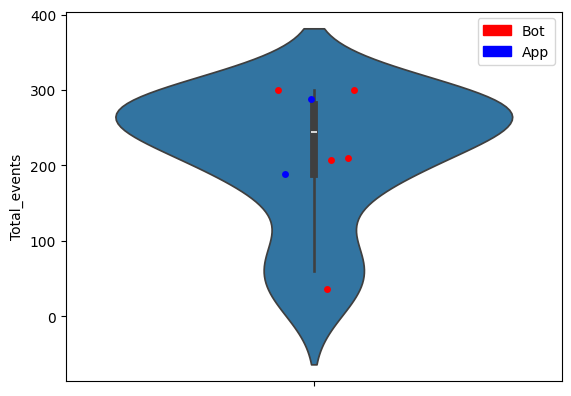

In [177]:
# YOUR CODE BELOW.
df_number_of_event = final_df.copy(deep=True)
df_number_of_event['Total_events'] = df_number_of_event[["PR", "issue", "commit", "repo"]].sum(axis=1)
display(df_number_of_event.head(n=10))

plot_violin(pd.merge(df_number_of_event, app_df, on='contributor'), event_group='Total_events')

#### Number of event types

In [ ]:
# YOUR CODE BELOW

#### Mean number of events per event type

In [ ]:
# YOUR CODE BELOW

#### Mean number of events per event group

In [ ]:
# YOUR CODE BELOW

#### Gini coeﬃcient of time between consecutive event

In [ ]:
def time_diffs(time_stamps):
    diff_time_stamps = np.array([])
    for i in range(len(time_stamps)-1):
        diff = (time_stamps.iloc[i+1] - time_stamps.iloc[i])/pd.to_timedelta('1 second')
        diff_time_stamps = np.append(diff_time_stamps, [diff])
    return(diff_time_stamps)

In [ ]:
def gini(time_stamps):
    '''
    args: time_stamps - Series of time stamps for a contributor
    
    return: g_coeff - float that gives gini coefficient
    
    method: calculate the Gini coefficient of a numpy array
    '''
    array = time_diffs(time_stamps)
    array = array[array!=0]
    if len(array) == 0:
        return np.float64(0.0)
    array = array.flatten()
    array = np.sort(array)
    index = np.arange(1, array.shape[0] + 1)
    n = array.shape[0]
    g_coeff = (np.sum((2 * index - n - 1) * array)) / (n * np.sum(array))
    
    return (g_coeff.round(4))

You can pass a Series of time-stamps to gini(time_stamps) function to get the Gini coeﬃcient
#### Hint:
1. Groupby the contributors on 'contributor' and use gini as .agg function on 'created_at'.
2. Merge the resultant DataFram with their type (the df that you got in section 4)
3. Make box/boxen/violin plots on those gini values

In [170]:
# YOUR CODE BELOW



In [ ]:
# YOUR CODE BELOW

### Question 6.1

#### Do you ﬁnd any set of accounts having a diverging behaviour? (Hint: look for outliers.)

### Question 6.2

#### What is the type of the accounts that have diverging behaviour?

### Question 6.3

#### Do bots have different behaviour than apps? Motivate your answer

### Question 6.4

#### Do bots and apps have a diﬀerent behaviour from human accounts? (Hint: in the box plots ﬁnd where the bots and apps are located and find where the humans are located)

### Question 6.5

#### Do all bots (other than outliers) have the same behaviour? List the bots that have a diﬀerent behaviour. Mention your interpretation on the cause of this diverging behaviour compared to other bots?